### Lets get the Resumes and put them in a csv file

Lets get the required dependencies to see the dataframe that will be created

In [38]:
import pandas as pd

# %pip install importlib

In [39]:
!pip install python-docx PyPDF2 textract
#!sudo apt-get install antiword this is basically for the doc format which is old


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [40]:
import os
import pandas as pd
import textract

# Define the base directory containing the resumes
base_dir = 'resumes categorised'

# Initialize a list to store the data
data = []

def read_text(file):
    try:
        text = textract.process(file)
        return text.decode('utf-8')
    except Exception as e:
        print(f'Error extracting text from {file}: {e}')
        return None

# Walk through the directory structure
for root, dirs, files in os.walk(base_dir):
    for file_name in files:
        # Print the file name for debugging purposes
        print(f'Processing file: {file_name}')
        
        # Extract the category from the folder name
        category = os.path.basename(root)
        
        # Handle different file types
        file_path = os.path.join(root, file_name)
        if file_name.endswith('.docx') or file_name.endswith('.doc'):
            content = read_text(file_path)
        elif file_name.endswith('.pdf'):
            content = read_text(file_path)
        else:
            print(f'Skipping file: {file_name} (unsupported format)')
            continue
        
        if content is not None:
            data.append({'Resume': content, 'Category': category})
            print(f'Read file {file_name} with category {category}')
        else:
            print(f'Failed to read file {file_name}. Content is None.')

# Create a DataFrame from the data
df = pd.DataFrame(data)
# Save the DataFrame to a CSV file
df.to_csv('all_resumes.csv', index=False)
print('Resumes data saved to CSV file successfully!')


Processing file: React Dev_Krishna Kanth_Musquare Technologies.docx
Read file React Dev_Krishna Kanth_Musquare Technologies.docx with category React
Processing file: React Developer_PavasGoswami.doc
Read file React Developer_PavasGoswami.doc with category React
Processing file: React Developer_Haripriya.docx
Read file React Developer_Haripriya.docx with category React
Processing file: React Developer_Sarala Madasu-converted.docx
Read file React Developer_Sarala Madasu-converted.docx with category React
Processing file: React Developer_Kamalakar Reddy.docx
Read file React Developer_Kamalakar Reddy.docx with category React
Processing file: React Developer_Thirupathiamma.docx
Read file React Developer_Thirupathiamma.docx with category React
Processing file: React Dev_Krishna Kanth.docx
Read file React Dev_Krishna Kanth.docx with category React
Processing file: React Developer_Naveen sadhu.docx
Read file React Developer_Naveen sadhu.docx with category React
Processing file: React Developer

### Lets read the Dataset and check its contents

In [41]:
data = pd.read_csv("all_resumes.csv")

df = data.copy() 

In [42]:
df

,Resume,Category
0,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React
1,\n [pic]\n\nPROFILE\n\n Searching for the oppo...,React
2,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React
3,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React
...,...,...
74,\n CURRICULUM VIT...,Reactjs
75,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,Reactjs
76,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,Reactjs
77,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,Reactjs


In [43]:
df.columns

Index(['Resume', 'Category'], dtype='object')

In [44]:
df["Category"].value_counts()

Category
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
React                              11
Reactjs                            11
internship                          2
Name: count, dtype: int64

In [45]:
df.shape

(79, 2)

### Let's import the nltk library for further processing

In [46]:
import nltk

In [47]:
df1 = df.copy()

In [48]:
df1.columns

Index(['Resume', 'Category'], dtype='object')

Lets start with first tokenizing the Resumes data

In [49]:
from nltk.tokenize import word_tokenize

df1["Tokens"] = df1["Resume"].apply(word_tokenize)

In [50]:
df1["Tokens"]

0     [Ui-Developer/, React, JS, Developer, NAME, :,...
1     [[, pic, ], PROFILE, Searching, for, the, oppo...
2     [HARIPRIYA, BATTINA, Experience, as, UI, Devel...
3     [SARALA, MADASU, SARALA, MADASU, , 204, ,, Sr...
4     [KAMALAKAR, REDDY, ., A, Linked, In, :, https,...
                            ...                        
74    [CURRICULUM, VITAE, |Anjani, Priyadarshini, |O...
75    [Ranga, Gaganam, Professional, Summary, :, Pro...
76    [SHAIK, ABDUL, SHARUK, 2, years, ’, Experience...
77    [MAREEDU, LOKESH, BABU, PROFESSIONAL, OVERVIEW...
78    [Venkatalakshmi, Pedireddy, Software, Develope...
Name: Tokens, Length: 79, dtype: object

### Lets remove the punctuations from this data for smooth processing

In [51]:
import string as s

In [52]:
punctuations = s.punctuation

In [53]:
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
df1["Tokens"] = df1["Tokens"].apply(lambda x: [ word for word in x if word not in punctuations])

In [55]:
print(df1)

                                               Resume Category  \
0   Ui-Developer/ React JS Developer \n\nNAME: KRI...    React   
1   \n [pic]\n\nPROFILE\n\n Searching for the oppo...    React   
2   HARIPRIYA BATTINA \n\nExperience as UI Develop...    React   
3   SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...    React   
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....    React   
..                                                ...      ...   
74  \n                              CURRICULUM VIT...  Reactjs   
75  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  Reactjs   
76  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  Reactjs   
77  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  Reactjs   
78  Venkatalakshmi Pedireddy\n\nSoftware Developer...  Reactjs   

                                               Tokens  
0   [Ui-Developer/, React, JS, Developer, NAME, KR...  
1   [pic, PROFILE, Searching, for, the, opportunit...  
2   [HARIPRIYA, BATTINA, Experience, as

Lets normalize the data developed

In [56]:
df1["Tokens"] = df1["Tokens"].apply(lambda x: [word.lower() for word in x])

In [57]:
print(df1)

                                               Resume Category  \
0   Ui-Developer/ React JS Developer \n\nNAME: KRI...    React   
1   \n [pic]\n\nPROFILE\n\n Searching for the oppo...    React   
2   HARIPRIYA BATTINA \n\nExperience as UI Develop...    React   
3   SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...    React   
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....    React   
..                                                ...      ...   
74  \n                              CURRICULUM VIT...  Reactjs   
75  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  Reactjs   
76  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  Reactjs   
77  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  Reactjs   
78  Venkatalakshmi Pedireddy\n\nSoftware Developer...  Reactjs   

                                               Tokens  
0   [ui-developer/, react, js, developer, name, kr...  
1   [pic, profile, searching, for, the, opportunit...  
2   [haripriya, battina, experience, as

Lets now remove any stopwords if present in this data

In [58]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [59]:
# prompt: remove the stopwords from tokens_without_punctuation_lower

df1['Tokens_without_stopwords'] = df1['Tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Print the DataFrame with the new column
print(df1)


                                               Resume Category  \
0   Ui-Developer/ React JS Developer \n\nNAME: KRI...    React   
1   \n [pic]\n\nPROFILE\n\n Searching for the oppo...    React   
2   HARIPRIYA BATTINA \n\nExperience as UI Develop...    React   
3   SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...    React   
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....    React   
..                                                ...      ...   
74  \n                              CURRICULUM VIT...  Reactjs   
75  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  Reactjs   
76  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  Reactjs   
77  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  Reactjs   
78  Venkatalakshmi Pedireddy\n\nSoftware Developer...  Reactjs   

                                               Tokens  \
0   [ui-developer/, react, js, developer, name, kr...   
1   [pic, profile, searching, for, the, opportunit...   
2   [haripriya, battina, experience,

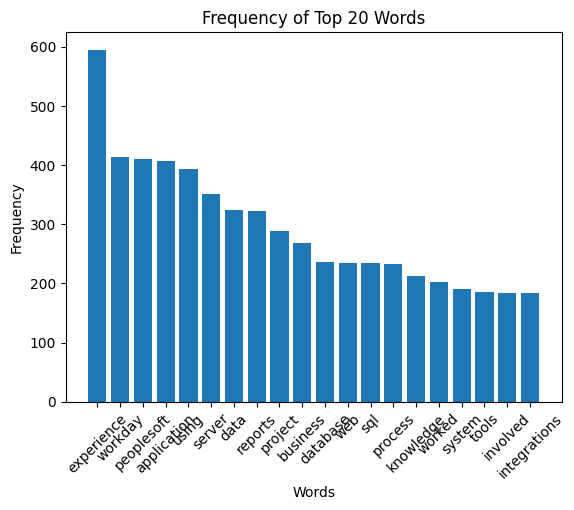

In [60]:
# prompt: count the frequency of each word from above tokens_without_punctuation_lower_without_stopwords and construct a bargraph on it

import matplotlib.pyplot as plt

# Create a dictionary to store the frequency of each word
word_frequency = {}

# Loop through each token in the DataFrame
for tokens in df1['Tokens_without_stopwords']:
    for token in tokens:
        # If the word is not already in the dictionary, add it with a frequency of 1
        if token not in word_frequency:
            word_frequency[token] = 1
        # Otherwise, increase the frequency by 1
        else:
            word_frequency[token] += 1

# Sort the dictionary by frequency in descending order
sorted_word_frequency = sorted(word_frequency.items(), key=lambda item: item[1], reverse=True)

# Extract the top 20 most frequent words
top_20_words = sorted_word_frequency[:20]

# Extract the words and frequencies
words, frequencies = zip(*top_20_words)

# Create a bar chart
plt.bar(words, frequencies)

# Set the title and axis labels
plt.title('Frequency of Top 20 Words')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [61]:
# prompt:  print the unique words from the sorted_tokens save it in another variable

unique_words = []
for word, frequency in sorted_word_frequency:
    unique_words.append(word)

print(unique_words)


['experience', 'workday', 'peoplesoft', 'application', 'using', 'server', 'data', 'reports', 'project', 'business', 'database', 'web', 'sql', 'process', 'knowledge', 'worked', 'system', 'tools', 'involved', 'integrations', 'client', 'like', 'integration', 'skills', 'support', 'hcm', 'good', 'creating', 'development', 'working', 'team', 'people', 'services', 'technical', 'servers', 'design', 'report', 'testing', 'various', '--', 'created', 'security', 'eib', 'production', 'management', 'oracle', 'developer', 'issues', 'studio', 'responsibilities', 'environment', 'work', 'react', 'custom', 'core', 'role', 'domains', 'date', 'professional', 'new', 'scheduler', 'applications', 'requirements', 'test', 'windows', 'developed', 'code', 'fields', 'js', 'consultant', 'technologies', 'used', 'requirement', 'years', 'user', 'information', 'change', 'systems', 'summary', 'software', 'reporting', 'responsible', 'per', 'performance', 'based', 'developing', 'different', 'maintenance', 'roles', 'functi

In [62]:
# prompt: apply the lemmatization to the above data

# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df1['Lemmatized_Tokens'] = df1['Tokens_without_stopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Print the DataFrame with the new column
print(df1)


                                               Resume Category  \
0   Ui-Developer/ React JS Developer \n\nNAME: KRI...    React   
1   \n [pic]\n\nPROFILE\n\n Searching for the oppo...    React   
2   HARIPRIYA BATTINA \n\nExperience as UI Develop...    React   
3   SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...    React   
4   KAMALAKAR REDDY. A \n\nLinked In: https://www....    React   
..                                                ...      ...   
74  \n                              CURRICULUM VIT...  Reactjs   
75  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  Reactjs   
76  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  Reactjs   
77  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  Reactjs   
78  Venkatalakshmi Pedireddy\n\nSoftware Developer...  Reactjs   

                                               Tokens  \
0   [ui-developer/, react, js, developer, name, kr...   
1   [pic, profile, searching, for, the, opportunit...   
2   [haripriya, battina, experience,

In [63]:
# prompt: give me the code for word cloud

from wordcloud import WordCloud

# Join all the tokens in the DataFrame into a single string
text = " ".join(df1['Lemmatized_Tokens'].sum())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=600, background_color="white").generate(text)

# Plot the wordcloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


ValueError: Only supported for TrueType fonts